# Vashu Agarwal
# E21CSEU0054 lab8


# Q1


In [103]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [104]:
dataset = pd.read_csv("/Users/vashuagarwal/Downloads/BENNETT_things/3rd_sem_bennett/CSET_211_SML/lab/lab8/bill_authentication.csv")

In [105]:
print(dataset.shape)
print(dataset.head(5))

(1372, 5)
   Variance  Skewness  Curtosis  Entropy  Class
0   3.62160    8.6661   -2.8073 -0.44699      0
1   4.54590    8.1674   -2.4586 -1.46210      0
2   3.86600   -2.6383    1.9242  0.10645      0
3   3.45660    9.5228   -4.0112 -3.59440      0
4   0.32924   -4.4552    4.5718 -0.98880      0


In [106]:
x =dataset.iloc[:,:-1].values
y =dataset.iloc[:,-1].values

In [107]:
print(x)

[[  3.6216    8.6661   -2.8073   -0.44699]
 [  4.5459    8.1674   -2.4586   -1.4621 ]
 [  3.866    -2.6383    1.9242    0.10645]
 ...
 [ -3.7503  -13.4586   17.5932   -2.7771 ]
 [ -3.5637   -8.3827   12.393    -1.2823 ]
 [ -2.5419   -0.65804   2.6842    1.1952 ]]


In [108]:
print(y)

[0 0 0 ... 1 1 1]


In [109]:
from sklearn.model_selection import train_test_split as tts
x_train,x_test,y_train,y_test = tts(x,y,test_size =0.2,random_state = 0)

In [110]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

# fit decision tree

### Using Entropy Information Gain

In [111]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(criterion = 'entropy',random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', random_state=0)

In [112]:
y_pred = classifier.predict(x_test)

In [113]:
print(y_pred)

[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 0 0 1 1 0 1 1 1]


In [114]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)

In [115]:
print(cm)

[[154   3]
 [  1 117]]


In [116]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the model 98.54545454545455%


In [117]:
from sklearn.metrics import classification_report
cm1 = classification_report(y_test, y_pred)
print(cm1)

              precision    recall  f1-score   support

           0       0.99      0.98      0.99       157
           1       0.97      0.99      0.98       118

    accuracy                           0.99       275
   macro avg       0.98      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



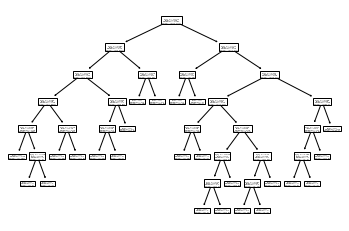

In [126]:

from sklearn import tree
tree.plot_tree(classifier)
plt.show()

### Using Gini Index

In [118]:
from sklearn.tree import DecisionTreeClassifier as DTC
classifier = DTC(criterion ='gini',random_state = 0)
classifier.fit(x_train,y_train)

DecisionTreeClassifier(random_state=0)

In [119]:
y_pred = classifier.predict(x_test)

In [120]:
print(y_pred)

[1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 1 1 0 0 1 0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0
 1 1 1 0 1 0 0 1 1 0 0 1 0 0 1 0 1 1 0 1 1 0 1 1 0 0 0 0 1 1 1 1 0 1 0 1 0
 0 1 0 0 0 0 1 1 0 0 1 1 0 0 0 0 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0 1 0 1 1 1 0
 1 0 0 1 0 0 0 1 1 0 0 1 1 1 1 1 0 1 0 0 0 0 0 0 1 0 0 0 0 1 0 1 1 0 0 1 0
 0 1 0 0 0 0 1 0 1 0 1 0 0 1 0 1 0 1 1 0 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 0
 1 0 1 1 0 0 0 1 0 1 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 1 1 0 0 0 0 0
 0 0 0 1 1 0 0 0 0 1 1 0 1 1 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 1 1 1 1 0 0 1 1
 1 0 0 0 1 0 0 1 1 0 1 1 0 1 1 1]


In [121]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test,y_pred)
print(cm)

[[155   2]
 [  0 118]]


In [122]:
from sklearn.metrics import accuracy_score
print("Accuracy of the model {0}%".format(accuracy_score(y_test,y_pred)*100))

Accuracy of the model 99.27272727272727%


In [123]:
from sklearn.metrics import classification_report
cm1 = classification_report(y_test, y_pred)
print(cm1)

              precision    recall  f1-score   support

           0       1.00      0.99      0.99       157
           1       0.98      1.00      0.99       118

    accuracy                           0.99       275
   macro avg       0.99      0.99      0.99       275
weighted avg       0.99      0.99      0.99       275



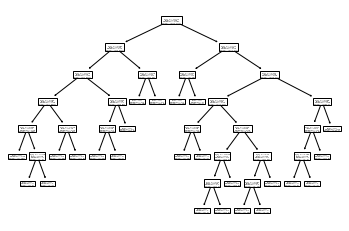

In [125]:

from sklearn import tree
tree.plot_tree(classifier)
plt.show()